# Dfs0

See [Dfs0 in MIKE IO Documentation](https://dhi.github.io/mikeio/user-guide/dfs0.html)


In [35]:
import pandas as pd
import mikeio

## Reading data

In [36]:
ds = mikeio.read("data/TemporalEqTime.dfs0")
ds

<mikeio.Dataset>
dims: (time:10)
time: 1970-01-01 00:00:03 - 1970-01-01 00:01:33 (10 records)
geometry: GeometryUndefined()
items:
  0:  WaterLevel item <Water Level> (meter)
  1:  WaterDepth item <Water Depth> (meter)

In [37]:
type(ds)

mikeio.dataset._dataset.Dataset

The MIKE IO `Dataset` are used by all Dfs classes (Dfs0,Dfs1,Dfs2,Dfs3, Dfsu).
A simple timeseries dataset can easily be converted to a Pandas DataFrame.

In [38]:
df = ds.to_dataframe() # convert dataset to dataframe
df

,WaterLevel item,WaterDepth item
1970-01-01 00:00:03,0.0,100.0
1970-01-01 00:00:13,1.0,101.0
1970-01-01 00:00:23,2.0,102.0
1970-01-01 00:00:33,3.0,103.0
1970-01-01 00:00:43,4.0,104.0
1970-01-01 00:00:53,5.0,105.0
1970-01-01 00:01:03,10.0,110.0
1970-01-01 00:01:13,11.0,111.0
1970-01-01 00:01:23,12.0,112.0
1970-01-01 00:01:33,13.0,113.0


## Writing data


In [39]:
df = pd.read_csv("data/naples_fl.csv", skiprows=1, parse_dates=True, index_col=0)
df

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
Date,,,,,,
2002-03-01,67.0,78.0,56.0,0.00,NaN,NaN
2002-03-02,76.0,83.0,69.0,0.00,NaN,NaN
2002-03-03,78.0,84.0,71.0,0.00,NaN,NaN
2002-03-04,64.0,76.0,51.0,0.08,NaN,NaN
2002-03-05,58.0,70.0,45.0,0.00,NaN,NaN
...,...,...,...,...,...,...
2021-08-11,NaN,93.0,77.0,0.23,NaN,NaN
2021-08-12,NaN,94.0,77.0,0.00,0.0,0.0
2021-08-13,NaN,95.0,77.0,0.03,0.0,0.0


You will probably have the need to parse certain a specific data formats many times, then it is a good idea to create a function.

In [40]:
def read_ncei_obs(filename):
    # old name : new name
    mapping = {'TAVG (Degrees Fahrenheit)': 'temperature_avg_f',
               'TMAX (Degrees Fahrenheit)': 'temperature_max_f',
               'TMIN (Degrees Fahrenheit)': 'temperature_min_f',
               'PRCP (Inches)': 'prec_in'}
    
    sel_cols = mapping.values() # No need to repeat ['temperature_avg_f',...]
    df = (
        pd.read_csv(filename, skiprows=1, parse_dates=True, index_col=0)
           .rename(columns=mapping)
    )[sel_cols]
    return df

In [41]:
df = read_ncei_obs("data/naples_fl.csv")
df.head()

,temperature_avg_f,temperature_max_f,temperature_min_f,prec_in
Date,,,,
2002-03-01,67.0,78.0,56.0,0.00
2002-03-02,76.0,83.0,69.0,0.00
2002-03-03,78.0,84.0,71.0,0.00
2002-03-04,64.0,76.0,51.0,0.08
2002-03-05,58.0,70.0,45.0,0.00


In [42]:
df.tail()

,temperature_avg_f,temperature_max_f,temperature_min_f,prec_in
Date,,,,
2021-08-11,NaN,93.0,77.0,0.23
2021-08-12,NaN,94.0,77.0,0.00
2021-08-13,NaN,95.0,77.0,0.03
2021-08-14,NaN,85.0,74.0,0.05
2021-08-15,NaN,83.0,75.0,0.01


In [43]:
df.shape

(7108, 4)

Convert temperature to Celsius and precipitation to mm.

In [44]:
df_final = df.assign(temperature_max_c=(df['temperature_max_f'] - 32)/1.8,
                 prec_mm=df['prec_in'] * 25.4)

df_final.head()

,temperature_avg_f,temperature_max_f,temperature_min_f,prec_in,temperature_max_c,prec_mm
Date,,,,,,
2002-03-01,67.0,78.0,56.0,0.00,25.555556,0.000
2002-03-02,76.0,83.0,69.0,0.00,28.333333,0.000
2002-03-03,78.0,84.0,71.0,0.00,28.888889,0.000
2002-03-04,64.0,76.0,51.0,0.08,24.444444,2.032
2002-03-05,58.0,70.0,45.0,0.00,21.111111,0.000


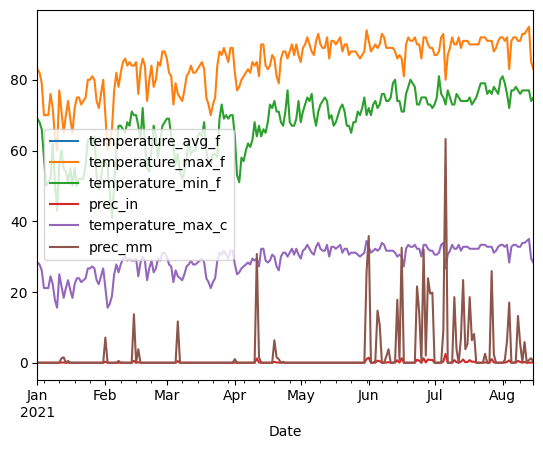

In [45]:
df_final.loc['2021'].plot();

Creating a dfs0 file from a dataframe is pretty straightforward.

1. Convert the dataframe to a `Dataset`

In [46]:
ds = mikeio.from_pandas(df_final)
ds

<mikeio.Dataset>
dims: (time:7108)
time: 2002-03-01 00:00:00 - 2021-08-15 00:00:00 (7108 records)
geometry: GeometryUndefined()
items:
  0:  temperature_avg_f <Undefined> (undefined)
  1:  temperature_max_f <Undefined> (undefined)
  2:  temperature_min_f <Undefined> (undefined)
  3:  prec_in <Undefined> (undefined)
  4:  temperature_max_c <Undefined> (undefined)
  5:  prec_mm <Undefined> (undefined)

2. Write the `Dataset` to a dfs0 file.

In [47]:
ds.to_dfs("output/naples_fl.dfs0")

Let's read it back in again...

In [48]:
saved_ds = mikeio.read("output/naples_fl.dfs0")
saved_ds

<mikeio.Dataset>
dims: (time:7108)
time: 2002-03-01 00:00:00 - 2021-08-15 00:00:00 (7108 records)
geometry: GeometryUndefined()
items:
  0:  temperature_avg_f <Undefined> (undefined)
  1:  temperature_max_f <Undefined> (undefined)
  2:  temperature_min_f <Undefined> (undefined)
  3:  prec_in <Undefined> (undefined)
  4:  temperature_max_c <Undefined> (undefined)
  5:  prec_mm <Undefined> (undefined)

By default, EUM types are undefined. But it can be specified. Let's select a few colums.

In [49]:
df2 = df_final[['temperature_max_c', 'prec_in']]
df2.head()

,temperature_max_c,prec_in
Date,,
2002-03-01,25.555556,0.00
2002-03-02,28.333333,0.00
2002-03-03,28.888889,0.00
2002-03-04,24.444444,0.08
2002-03-05,21.111111,0.00


In [50]:
from mikeio import ItemInfo, EUMType, EUMUnit

ds2 = mikeio.from_pandas(df2, 
                         items=[
                   ItemInfo(EUMType.Temperature),
                   ItemInfo(EUMType.Precipitation_Rate, EUMUnit.inch_per_day)]
           )
ds2

<mikeio.Dataset>
dims: (time:7108)
time: 2002-03-01 00:00:00 - 2021-08-15 00:00:00 (7108 records)
geometry: GeometryUndefined()
items:
  0:  temperature_max_c <Temperature> (degree Celsius)
  1:  prec_in <Precipitation Rate> (inch per day)

## EUM

In [51]:
from mikeio.eum import ItemInfo, EUMType, EUMUnit

EUMType.search("wind")


[Wind Velocity,
 Wind Direction,
 Wind friction factor,
 Wind speed,
 Depth of Wind,
 Wind friction speed]

In [52]:
EUMType.Wind_speed.units

[meter per sec, feet per sec, knot, km per hour, miles per hour]

### Inline Exercise

What is the best EUM Type for "peak wave direction"? What is the default unit? 

In [53]:
# insert your code here

## Precipitation data

In [54]:
df = pd.read_csv("data/precipitation.csv", parse_dates=True, index_col=0)
df.head()

,Precipitation station 1,Precipitation station 2,Precipitation station 3,Precipitation station 4,Precipitation station 5,Precipitation station 6,Precipitation station 7,Precipitation station 8,Precipitation station 9
date,,,,,,,,,
2001-01-01,0.0,0.000,0.021,0.071,0.000,0.000,0.025,0.025,0.000
2001-01-02,0.0,0.025,0.037,0.000,0.004,0.054,0.042,0.021,0.054
2001-01-03,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.042,0.000
2001-01-04,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001-01-05,0.0,0.000,0.158,0.021,0.000,0.000,0.017,0.021,0.000


In [55]:
from mikecore.DfsFile import DataValueType

(mikeio.from_pandas(df, items=ItemInfo(EUMType.Precipitation_Rate, EUMUnit.mm_per_hour, data_value_type=DataValueType.MeanStepBackward))
        .to_dfs("output/precipitation.dfs0")
)


## Selecting 

In [56]:
ds = mikeio.read("output/precipitation.dfs0", items=[1,4]) # select item by item number (starting from zero)
ds

<mikeio.Dataset>
dims: (time:31)
time: 2001-01-01 00:00:00 - 2001-01-31 00:00:00 (31 records)
geometry: GeometryUndefined()
items:
  0:  Precipitation station 2 <Precipitation Rate> (mm per hour)
  1:  Precipitation station 5 <Precipitation Rate> (mm per hour)

In [57]:
ds = mikeio.read("output/precipitation.dfs0", items=["Precipitation station 5","Precipitation station 1"]) # or by name (in the order you like it)
ds

<mikeio.Dataset>
dims: (time:31)
time: 2001-01-01 00:00:00 - 2001-01-31 00:00:00 (31 records)
geometry: GeometryUndefined()
items:
  0:  Precipitation station 5 <Precipitation Rate> (mm per hour)
  1:  Precipitation station 1 <Precipitation Rate> (mm per hour)

### Inline Exercise

Read all items to a variable ds. Select "Precipitation station 3" - which different ways can you select this item?  

In [58]:
# insert your code here

In [59]:
import utils

utils.sysinfo()


    System: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
    NumPy: 1.26.1
    Pandas: 2.1.2
    MIKE IO: 2.0.0
    Last modified: 2024-08-12 07:04:48.847115
    
